## Problem Statement

Identifying the best quality wine is a special skill and very few experts are specialized in accurately detecting the quality. The objective of this project is to simplify the process of detecting the quality of wine.

CRISP-ML(Q) process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

Objective(s): Minimize Shipment Organization Time

Constraints: Minimize Specialists' Dependency

Success Criteria

Business Success Criteria: Reduce the time of wine quality check to anywhere between 20% to 40%

ML Success Criteria: Achieve Silhouette coefficient of atleast 0.5

Economic Success Criteria: Wine distillers will see an increase in revenues by atleast 20%

Proposed Plan: Grouping the available wines will allow to understand the characteristics of each group.

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load wine dataset 
wine_df = pd.read_csv(r"C:\Users\Swapnil Mishra\Desktop\DS\DBSCAN 360 code\DBscan_clustering_codes\DBscan_clustering_codes\wine_data.csv")
wine_df

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0
...,...,...
173,1.74,740.0
174,1.56,750.0
175,1.56,835.0
176,1.62,840.0


In [3]:
# Data Dictionary
# OD_read: Amount of dilution in that particular wine type
# Proline : Amount of Proline in that particular wine type 
# Proline is typically the most abundant amino acid present in grape juice and wine

In [4]:
# EDA / Descriptive Statistics
# 1st Moment Business Decision (Measures of Central Tendency)
# Mean, Median, Mode
print(wine_df.mean())
print('\n')
print(wine_df.median())
print('\n')
print(wine_df.mode())

OD_read      2.611685
Proline    746.893258
dtype: float64


OD_read      2.78
Proline    673.50
dtype: float64


   OD_read  Proline
0     2.87    520.0
1      NaN    680.0


In [9]:
# 2nd Moment Business Decision (Measures of Dispersion)
# Variance,Standard Deviation,Range (Maximum - Minimum)
print(wine_df.var())
print('\n')
print(wine_df.std())
print('\n')
range_values = wine_df.max() - wine_df.min()
print(range_values)

OD_read        0.504086
Proline    99166.717355
dtype: float64


OD_read      0.709990
Proline    314.907474
dtype: float64


OD_read       2.73
Proline    1402.00
dtype: float64


In [10]:
# 3rd Moment Business Decision (Skewness)
# Measure of asymmetry
wine_df.skew()

OD_read   -0.307285
Proline    0.767822
dtype: float64

In [11]:
# 4th Moment Business Decision (Kurtosis)
# Measure of peakedness
wine_df.kurt()

OD_read   -1.086435
Proline   -0.248403
dtype: float64

In [12]:
# Descriptive Statistics and Data Distribution Function
wine_df.describe()

,OD_read,Proline
count,178.000000,178.000000
mean,2.611685,746.893258
std,0.709990,314.907474
min,1.270000,278.000000
25%,1.937500,500.500000
50%,2.780000,673.500000
75%,3.170000,985.000000
max,4.000000,1680.000000


In [14]:
#  Data Preprocessing and Cleaning
# Typecasting - Converting one data type to another
wine_df.dtypes

OD_read    float64
Proline    float64
dtype: object

In [15]:
# Handling Duplicates
duplicate = wine_df.duplicated() # Returns Boolean series denoting duplicate rows
print(duplicate)

print(sum(duplicate), '\n')
print(wine_df.shape)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool
1 

(178, 2)


In [16]:
# Removing Duplicates
wine_df = wine_df.drop_duplicates() # Returns DataFrame with duplicate rows removed
print(wine_df.shape)

(177, 2)


In [17]:
# Missing Value Analysis
# Imputation
wine_df.isnull().sum() # Checking for missing values

OD_read    0
Proline    0
dtype: int64

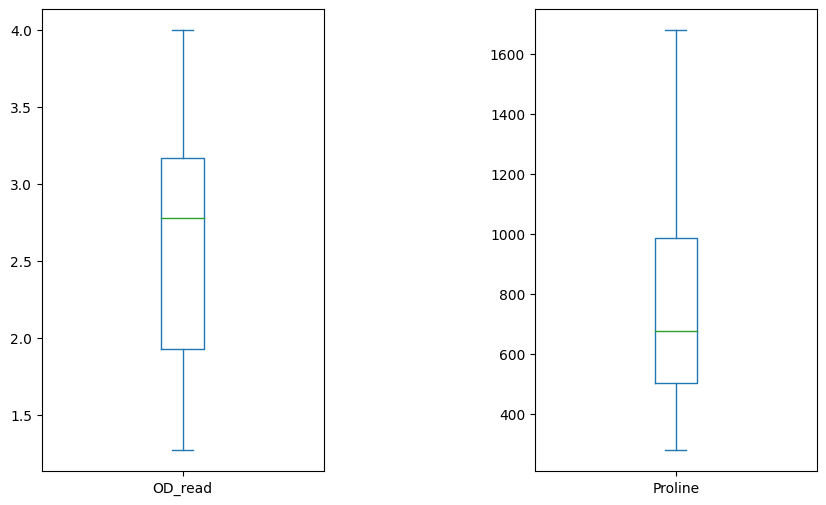

In [18]:
# Outliers Analysis
# Box Plot
# Multiple Boxplots in a single visualization
# Columns with larger scales affect other columns
# Below code ensures each column get its own axis
# pandas plot() function with parameters kind  = 'box' and subplots = True

wine_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10,6))
# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [19]:
# No outliers observed

In [20]:
# Zero and Near Zero Variance
wine_df.var()

OD_read        0.506257
Proline    98807.262776
dtype: float64

In [21]:
# Dummy variable Creation
wine_df.dtypes

OD_read    float64
Proline    float64
dtype: object

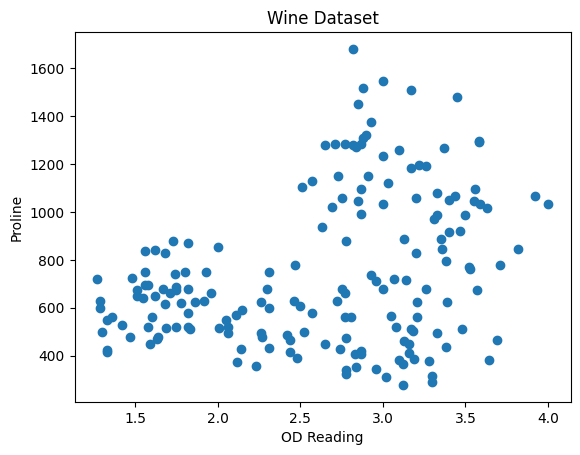

In [22]:
# Scatter Plot
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [23]:
# Generate Clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(3, linkage = 'average')
ac_clusters = ac.fit_predict(wine_df)

In [24]:
# Generate Clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

In [25]:
# Generate Clusters using DBSCAN

db_param_options = [[20,5], [25,5], [30,5], [25,7], [35,7], [40,5]]

for ep,min_sample in db_param_options:
    db = DBSCAN(eps = ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ",ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine_df , db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.39874666620956795
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35314558258398593
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.4385447900003894
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2656897340492712
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.46097357383412935
Eps:  40 Min Samples:  5
DBSCAN Clustering:  0.5746293909096545


In [26]:
# Generate clusters using DBSCAN
db = DBSCAN(eps =40, min_samples = 5)
db_clusters = db.fit_predict(wine_df)

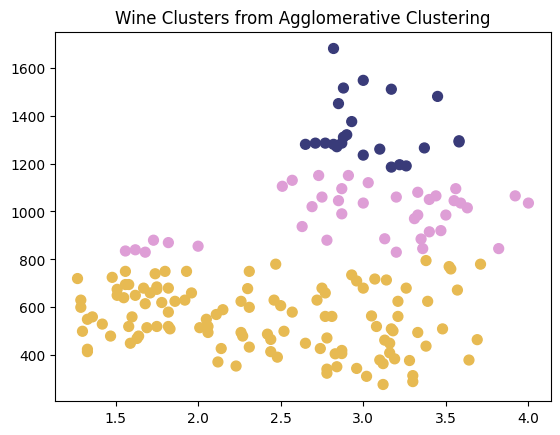

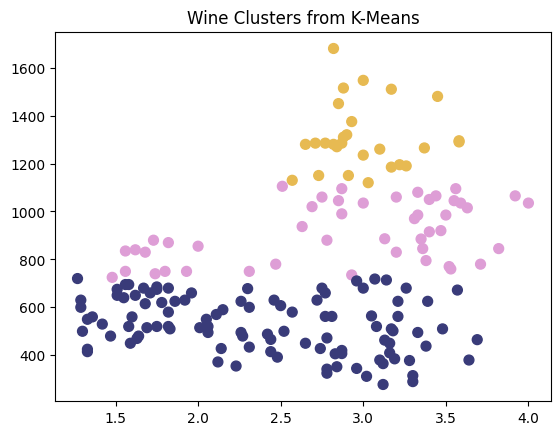

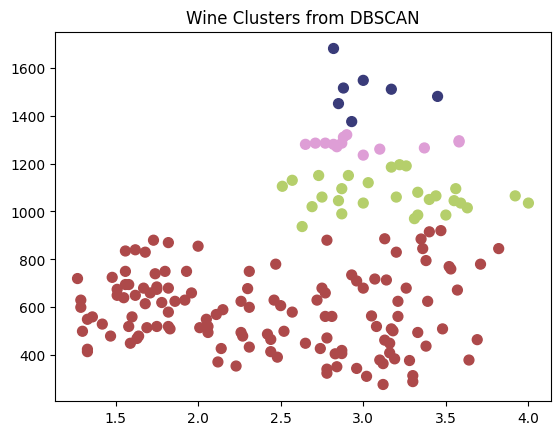

In [28]:
plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c = ac_clusters, s =50,
            cmap = 'tab20b' )
plt.show()

plt.title("Wine Clusters from K-Means")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c = km_clusters, s =50,
           cmap = 'tab20b')
plt.show()

plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c =db_clusters, s =50 ,
           cmap = 'tab20b')
plt.show()

In [29]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset: \n")
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

print("K-Means Clustering: ",silhouette_score(wine_df, km_clusters))

print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset: 

Agg Clustering:  0.5995682349948996
K-Means Clustering:  0.5690657121096262
DBSCAN Clustering:  0.5746293909096545
